In [1]:
import numpy as np
import math
import operator
import pandas as pd
import os
import time
from datetime import datetime
from time import mktime

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
# style.use('dark_background')
style.use('default')

#import re
#import urllib
#path = "/home/juanma/Datos/owncloud_UPM/programacion/python/marcadores"
#url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"
#sales_data = pd.read_csv(url)
#data = pd.read_csv("iris.csv")
# data = pd.read_excel('Data/Datos_Clave_Colon_days_clean_jmp.xlsm', header=0)
# df_data = pd.read_excel('Data/COMPLETO4.xlsx')

C:\Users\juanm\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_recaid = pd.read_excel('cito_histo_cohort_tiempos_recae_FJD_HRC_HCR_crop.xlsx')

In [3]:
df_recaid.columns

Index(['Unnamed: 0', 'CODIGO PACIENTE', 'FECHA MUESTRA', 'FECHA DX 1L',
       'FECHA DX 2L', 'T', 'N', 'M', 'porcentaje_BCRP1', 'porcentaje_AC133',
       'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6',
       'porcentaje_TROP2', 'porcentaje_CD44', 'T_recaida1', 'T_recaida2',
       'T_hasta_recaida', 'T_desde_recaida', 'recae?', 'cohort'],
      dtype='object')

In [4]:
df_recaid.rename(columns={'Unnamed: 0': 'CODIGO MUESTRA'}, inplace=True)

In [5]:
df_recaid.set_index('CODIGO MUESTRA',drop=False, inplace=True)

In [6]:
cols_markers= ['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_LGR5',
       'porcentaje_CD34', 'porcentaje_CD166',  'porcentaje_EPCAM', 'porcentaje_TROP2','porcentaje_CD44V6', ]

In [7]:
columns = ['CODIGO MUESTRA'] + cols_markers + ['recae?'] # en otros archivos 'Unnamed: 0' es 'id_muestra'
print(columns)

['CODIGO MUESTRA', 'porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_CD166', 'porcentaje_EPCAM', 'porcentaje_TROP2', 'porcentaje_CD44V6', 'recae?']


In [8]:
df_data_hist = df_recaid[columns].copy()

In [9]:
df_data_hist.head()

,CODIGO MUESTRA,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,recae?
CODIGO MUESTRA,,,,,,,,,,,
HJD0001,HJD0001,92.839,58.139,63.939,NaN,NaN,NaN,10.80,NaN,NaN,True
HJD0023,HJD0023,78.500,4.170,23.400,80.00,76.10,15.50,0.00,8.250,86.20,True
HJD0083,HJD0083,0.098,0.200,0.480,40.10,0.14,0.28,0.14,0.000,0.00,False
HJD0086,HJD0086,0.000,0.000,0.000,0.23,0.00,1.28,0.00,0.072,1.62,False
HJD0002,HJD0002,99.200,52.600,56.800,NaN,NaN,NaN,6.43,NaN,NaN,False


Vamos a ver cuántos "NaN" tiene cada columna para ver si hay que quitar alguna

In [10]:
print(df_data_hist.isnull().sum())

CODIGO MUESTRA        0
porcentaje_BCRP1      0
porcentaje_AC133      0
porcentaje_CD133      3
porcentaje_LGR5       8
porcentaje_CD34       7
porcentaje_CD166     16
porcentaje_EPCAM      3
porcentaje_TROP2     21
porcentaje_CD44V6     6
recae?                0
dtype: int64


## Quito "CD36" y "RAGE" porque tienen más de 75 NaN !!!!

In [11]:
cols_markers2= ['porcentaje_BCRP1',
       'porcentaje_AC133', 'porcentaje_CD133', 'porcentaje_LGR5',
       'porcentaje_CD34', 'porcentaje_CD166',
       'porcentaje_EPCAM', 'porcentaje_TROP2', 'porcentaje_CD44V6'] #### quito  'porcentaje_DCLK1',

In [12]:
df2 = df_data_hist[['CODIGO MUESTRA'] + cols_markers+['recae?']].copy()  ### 'Unnamed: 0'  es 'id_muestra'
df2.head()

,CODIGO MUESTRA,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,recae?
CODIGO MUESTRA,,,,,,,,,,,
HJD0001,HJD0001,92.839,58.139,63.939,NaN,NaN,NaN,10.80,NaN,NaN,True
HJD0023,HJD0023,78.500,4.170,23.400,80.00,76.10,15.50,0.00,8.250,86.20,True
HJD0083,HJD0083,0.098,0.200,0.480,40.10,0.14,0.28,0.14,0.000,0.00,False
HJD0086,HJD0086,0.000,0.000,0.000,0.23,0.00,1.28,0.00,0.072,1.62,False
HJD0002,HJD0002,99.200,52.600,56.800,NaN,NaN,NaN,6.43,NaN,NaN,False


In [13]:
df2.dropna(axis=0, inplace=True)

In [14]:
print(df2.isnull().sum())

CODIGO MUESTRA       0
porcentaje_BCRP1     0
porcentaje_AC133     0
porcentaje_CD133     0
porcentaje_LGR5      0
porcentaje_CD34      0
porcentaje_CD166     0
porcentaje_EPCAM     0
porcentaje_TROP2     0
porcentaje_CD44V6    0
recae?               0
dtype: int64


### Eliminar filas para probar

In [15]:
df3 = df2.copy()

In [16]:
df3.head()

,CODIGO MUESTRA,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,recae?
CODIGO MUESTRA,,,,,,,,,,,
HJD0023,HJD0023,78.500,4.170,23.400,80.000,76.100,15.500,0.000,8.250,86.200,True
HJD0083,HJD0083,0.098,0.200,0.480,40.100,0.140,0.280,0.140,0.000,0.000,False
HJD0086,HJD0086,0.000,0.000,0.000,0.230,0.000,1.280,0.000,0.072,1.620,False
HJD0068,HJD0068,0.130,0.022,0.071,2.640,0.200,0.510,0.049,0.000,0.045,False
HJD0094,HJD0094,0.000,0.000,0.096,0.131,0.326,0.566,0.051,0.000,0.161,False


### Elimino por número de fila

In [17]:
df3.drop(df3.index[1], axis=0, inplace=True)
df3.head()

,CODIGO MUESTRA,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,recae?
CODIGO MUESTRA,,,,,,,,,,,
HJD0023,HJD0023,78.50,4.170,23.400,80.000,76.100,15.500,0.000,8.250,86.200,True
HJD0086,HJD0086,0.00,0.000,0.000,0.230,0.000,1.280,0.000,0.072,1.620,False
HJD0068,HJD0068,0.13,0.022,0.071,2.640,0.200,0.510,0.049,0.000,0.045,False
HJD0094,HJD0094,0.00,0.000,0.096,0.131,0.326,0.566,0.051,0.000,0.161,False
HJD0025,HJD0025,0.00,0.130,0.000,2.610,0.620,0.520,0.000,0.000,0.076,True


### Elimino por valor en una columna

In [21]:
if 'Unnamed: 0' in df3.columns:
    df3.drop(df3[df3['Unnamed: 0']=='HJD0064'].index, axis=0, inplace=True)
df3.head()

,CODIGO MUESTRA,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_CD166,porcentaje_EPCAM,porcentaje_TROP2,porcentaje_CD44V6,recae?
CODIGO MUESTRA,,,,,,,,,,,
HJD0023,HJD0023,78.50,4.170,23.400,80.000,76.100,15.500,0.000,8.250,86.200,True
HJD0086,HJD0086,0.00,0.000,0.000,0.230,0.000,1.280,0.000,0.072,1.620,False
HJD0068,HJD0068,0.13,0.022,0.071,2.640,0.200,0.510,0.049,0.000,0.045,False
HJD0094,HJD0094,0.00,0.000,0.096,0.131,0.326,0.566,0.051,0.000,0.161,False
HJD0025,HJD0025,0.00,0.130,0.000,2.610,0.620,0.520,0.000,0.000,0.076,True


In [19]:
# df2.to_excel('cito_histo_cohort_recae_FJD_HRC_HCR_crop_sin_NaN.xlsx')

In [20]:
#################
### Ejecutar solo si se ha quitado alguna fila para probar

df2 = df3.copy()
################

In [ ]:
df2.head()


### Asignamos a "X" las columnas con las que queremos trabajar para predecir y a "y" el target

In [22]:

X = df2[cols_markers2].copy()
y = df2['recae?']

Ahora pruebo distintos algoritmos de Machine Learning

In [23]:
from sklearn import preprocessing as preproc
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate,  cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import accuracy_score, confusion_matrix, f1_score, recall_score

In [24]:
scaler = preproc.MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)

XX = scaler.transform(X)
y = y.values

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [26]:
# kf = KFold(n_splits=3, shuffle=True, random_state=68)
strat_KF = StratifiedKFold(n_splits=3, shuffle=True, random_state=16)

In [27]:
# instantiate the model (using CLASS_WEIGHT = 'BALANCED') PARA TENER EN CUENTA DATOS DESBALANCEADOS
##############################
logreg = LogisticRegression(random_state=16, C=1, solver='liblinear', class_weight='balanced')
##############################
cv_results = cross_validate(logreg, XX, y, cv=strat_KF,  verbose=True)
print('cv-results:',  cv_results.keys(), cv_results['test_score'])

splits = list(strat_KF.split(XX,y))
# fit the model with data
for split in splits:
    i_train = split[0]
    i_test = split[1]
    X_train = XX[i_train]
    y_train = y[i_train]
#     print('y_train:', y_train)
    logreg.fit(X_train, y_train)  #### Logistic Regression es el mejor modelo hasta ahora pero se pueden probar otros
    
    X_test = XX[i_test]
    y_test = y[i_test]
    y_pred = logreg.predict(X_test)
#     print('y_test:', y_test)
#     print('y_pred:', y_pred)

    i_pred_true = np.where(y_pred==True)
#     print(i_true[0])
    id_pred_true = df2.iloc[i_pred_true[0],0]
    print('id_muestra con predicción True:\n', id_pred_true)
    i_true = np.where(y_test==True)
    id_true = df2.iloc[i_true[0],0]    
    print('id_muestra verdaderamente True:\n', id_true)
    print(confusion_matrix(y_test, y_pred))
    print('accuracy:', accuracy_score(y_test, y_pred))
    print('f1:', f1_score(y_test, y_pred))
    print('recall:', recall_score(y_test, y_pred))


cv-results: dict_keys(['fit_time', 'score_time', 'test_score']) [0.69444444 0.94444444 0.91666667]
id_muestra con predicción True:
 CODIGO MUESTRA
HJD0025    HJD0025
HJD0022    HJD0022
HJD0061    HJD0061
HJD0019    HJD0019
HJD0052    HJD0052
HJD0095    HJD0095
HJD0040    HJD0040
HJD0028    HJD0028
HJD0073    HJD0073
HJD0041    HJD0041
HJD0079    HJD0079
HJD0039    HJD0039
Name: CODIGO MUESTRA, dtype: object
id_muestra verdaderamente True:
 CODIGO MUESTRA
HJD0086    HJD0086
HJD0025    HJD0025
HJD0079    HJD0079
Name: CODIGO MUESTRA, dtype: object
[[23 10]
 [ 1  2]]
accuracy: 0.6944444444444444
f1: 0.26666666666666666
recall: 0.6666666666666666
id_muestra con predicción True:
 CODIGO MUESTRA
HJD0073    HJD0073
HJD0029    HJD0029
HJD0041    HJD0041
HJD0079    HJD0079
HJD0039    HJD0039
Name: CODIGO MUESTRA, dtype: object
id_muestra verdaderamente True:
 CODIGO MUESTRA
HJD0073    HJD0073
HJD0041    HJD0041
HJD0039    HJD0039
Name: CODIGO MUESTRA, dtype: object
[[31  2]
 [ 0  3]]
accuracy: 

<Axes: ylabel='Feature'>

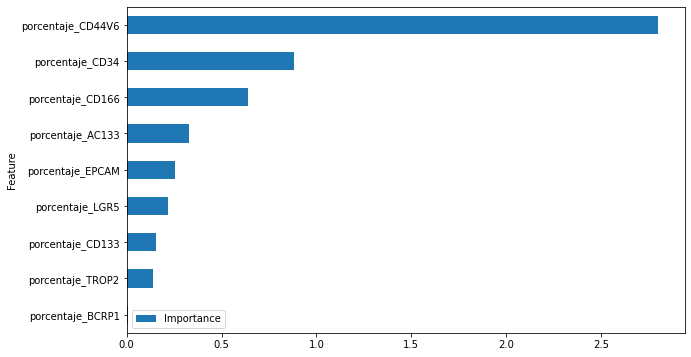

In [28]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(logreg, X_test, y_test, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

## Probamos con archivo con nuevos valores

In [32]:
df_test= pd.read_excel('cito_histo_cohort_tiempos_recae_FJD_HRC_HCR_crop2.xlsx')

In [33]:
df_test

,Unnamed: 0,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX 1L,FECHA DX 2L,T,N,M,porcentaje_BCRP1,porcentaje_AC133,...,porcentaje_CD166,porcentaje_CD44V6,porcentaje_TROP2,porcentaje_CD44,T_recaida1,T_recaida2,T_hasta_recaida,T_desde_recaida,recae?,cohort
0,HCR0018,HCRP0018,15-09-2022,26-04-2022,09-11-2022,T3,N1,M1,30.300,6.930,...,1.610,35.980,0.000,37.880,-142.0,55.0,55.0,142.0,True,M1
1,HCR0019,HCRP0019,15-09-2022,14-02-2021,21-12-2021,T3,N3,M0,55.900,53.200,...,3.390,79.800,6.470,81.600,-578.0,-268.0,NaN,268.0,False,N1M0
2,HCR0020,HCRP0020,15-09-2022,05-01-2023,NaN,T3,N1,M0,45.900,43.900,...,1.290,66.100,2.190,76.500,112.0,NaN,112.0,NaN,True,N1M0
3,HCR0021,HCRP0021,27-09-2022,NaN,NaN,T3,N0,M0,12.600,8.000,...,0.043,28.100,0.058,58.700,NaN,NaN,NaN,NaN,False,N0M0
4,HCR0022,HCRP0022,27-09-2022,20-01-2020,20-08-2021,T3,N0,M0,19.100,14.200,...,0.048,33.900,0.000,38.600,-981.0,-403.0,NaN,403.0,False,N0M0
5,HCR0023,HCRP0023,27-09-2022,30-04-2020,21-04-2021,T2,N1,M0,3.110,2.350,...,0.170,18.700,0.000,25.600,-880.0,-524.0,NaN,524.0,False,N1M0
6,HCR0024,HCRP0024,27-09-2022,NaN,NaN,T2,N0,M0,22.300,22.060,...,0.130,37.260,0.370,56.260,NaN,NaN,NaN,NaN,False,N0M0
7,HCR0025,HCRP0025,27-09-2022,19-12-2018,25-01-2021,T3,N1,M0,4.610,4.821,...,0.041,25.801,0.000,69.601,-1378.0,-610.0,NaN,610.0,False,N1M0
8,HCR0026,HCRP0026,27-09-2022,NaN,NaN,T3,N2,M0,37.600,29.471,...,10.800,58.571,12.900,74.671,NaN,NaN,NaN,NaN,False,N1M0
9,HCR0027,HCRP0027,27-09-2022,NaN,NaN,T3,N2,M0,22.600,26.400,...,0.290,53.100,0.031,77.300,NaN,NaN,NaN,NaN,False,N1M0


In [34]:
X2 = df_test[cols_markers2].copy()
y2 = df_test['recae?']

In [36]:
scaler = preproc.MinMaxScaler(feature_range=(0, 1))
scaler.fit(X2)

XX2 = scaler.transform(X2)
y2 = y2.values

In [37]:
strat_KF = StratifiedKFold(n_splits=3, shuffle=True, random_state=16)

In [45]:
### Prediction of the test values with the model

X_test = XX2
y_test = y2
y_pred = logreg.predict(X_test)
#     print('y_test:', y_test)
#     print('y_pred:', y_pred)

i_pred_true = np.where(y_pred==True)
#     print(i_true[0])
id_pred_true = df_test.iloc[i_pred_true[0],0]
print('id_muestra con predicción True:\n', id_pred_true)
i_true = np.where(y_test==True)
id_true = df_test.iloc[i_true[0],0]    
print('id_muestra verdaderamente True:\n', id_true)
print(confusion_matrix(y_test, y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))


id_muestra con predicción True:
 1     HCR0019
2     HCR0020
9     HCR0027
10    HCR0028
12    HCR0030
13    HCR0031
14    HCR0032
16    HCR0034
Name: Unnamed: 0, dtype: object
id_muestra verdaderamente True:
 0     HCR0018
2     HCR0020
16    HCR0034
Name: Unnamed: 0, dtype: object
[[9 6]
 [1 2]]
accuracy: 0.6111111111111112
f1: 0.36363636363636365
recall: 0.6666666666666666


## GridSearchCV

Para busar los mejores parámetros

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

scores = ['accuracy', 'f1', 'recall']

for score in scores:
    print('score:', score)
    # Initialize StratifiedKFold for both outer and inner cross-validation
    outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Initialize GridSearchCV with StratifiedKFold
#     grid_search = GridSearchCV(SVC(), param_grid, cv=inner_cv, scoring=score)


    grid_search = GridSearchCV(logreg, param_grid, cv=inner_cv, scoring=score)
    
    

    # Perform nested cross-validation
    outer_scores = []

    for fold, (train_index, test_index) in enumerate(outer_cv.split(XX, y), 1):
#     fold, index = outer_cv.split(XX, y)
    
        X_train, X_test = XX[train_index], XX[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        # Evaluate best model on test set
        best_model = grid_search.best_estimator_
        score = best_model.score(X_test, y_test)
        outer_scores.append(score)

        print(f"Fold {fold}:")
        print(f"  Best parameters: {grid_search.best_params_}")
        print(f"  Test accuracy: {score:.4f}")
        print()

    print(f"Mean accuracy: {np.mean(outer_scores):.4f} (+/- {np.std(outer_scores):.4f})")

In [42]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc", cv=cv)
search.fit(XX, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3], 'kernel': ['poly']},
                         {'kernel': ['rbf']}],
             scoring='roc_auc')

In [43]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
linear,{'kernel': 'linear'},1,0.682383,0.148270
2_poly,"{'degree': 2, 'kernel': 'poly'}",2,0.641097,0.194021
rbf,{'kernel': 'rbf'},3,0.614211,0.190762
3_poly,"{'degree': 3, 'kernel': 'poly'}",4,0.521965,0.215751


In [ ]:
help(cross_validate)

In [ ]:
cv_scores = cross_val_score(logreg, XX, y, cv=strat_KF)
print('cv_scores:', cv_scores)

In [ ]:
from sklearn.cross_validation import train_test_split

#print(df[:15])
X = df.get(key=cols_markers)
#X = df.get(key=['CD133_sin'])
print(type(X))
Y = df.get(key=['gd'])
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)



In [ ]:
# dir(sklearn.model_selection)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

#print(X)

forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))
pred = forest.predict(testX)


Ahora incluyendo la EDAD

In [ ]:
X1 = df.get(key=['EDAD','CD133_sin', 'AC133_sin','BCRP1_sin','EpCAM_sin'])
Y1 = df.get(key=['RECAE_0'])
#print(X)
trainX1, testX1, trainY1, testY1 = train_test_split(X1, Y1, test_size = 0.3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX,trainY)
print('Accuracy: \n', neigh.score(testX, testY))
pred = neigh.predict(testX)
print(pred)
print(df.RECAE_bin[testX.index])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, trainnYdata['Name'])

# Predicted class
print(neigh.predict(test))


In [ ]:
# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)


In [ ]:
# Defining our KNN model
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1
 
    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5



In [ ]:
# Creating a dummy testset
testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

In [ ]:
#### Start of STEP 2
# Setting number of neighbors = 1
k = 5
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print(result)

In [ ]:
print(neigh)

# Ahora con Scikit-learn

In [ ]:
# 3 nearest neighbors
print(neigh.kneighbors(test)[1])

In [ ]:
print(len(data))
datos=data.copy()
df=pd.DataFrame(datos)
df['CD133_sin']=df.CD133_APC.fillna(0)+df.CD133_PE.fillna(0)
df['AC133_sin']=df.AC133_APC.fillna(0)+df.AC133_PE.fillna(0)
df['BCRP1_sin']= pd.to_numeric(df['BCRP1'], errors='coerce').fillna(0)
df['EpCAM_sin']=df.EpCAM.fillna(0)
df['EDAD']=df.EDAD.fillna(50)
print(df)
df.corr()    

In [ ]:
df['RECAE_t']=pd.to_numeric(df['DIAS']/30.0, errors='coerce').fillna(30000, downcast='infer')
print(df['RECAE_t'])
df['RECAE_bin']=df['RECAE_t'].lt(120)
print(df['RECAE_bin'])
df['RECAE_0']=1.0*df['RECAE_bin']
#print(df.RECAE_0)
NO_RECAE=df.RECAE_0[df.RECAE_0==0.0]
print(NO_RECAE)
print(len(NO_RECAE))